 Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

ИУ5-65Б Бенц Ян Вариант 2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
from sklearn.datasets import load_wine
raw = load_wine()

In [36]:
raw.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [37]:
raw.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [38]:
data = pd.DataFrame(data= np.c_[raw['data'], raw['target']],
                     columns= raw['feature_names'] + ['wine classes'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

Датасет не содержит пропусков

Задача классификации

Метод опорных векторов

In [40]:
wine_x = raw.data[:,:2]
wine_y = raw.target

In [41]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_x, wine_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_x[:, 0], wine_x[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

C:\ml_rk2\env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


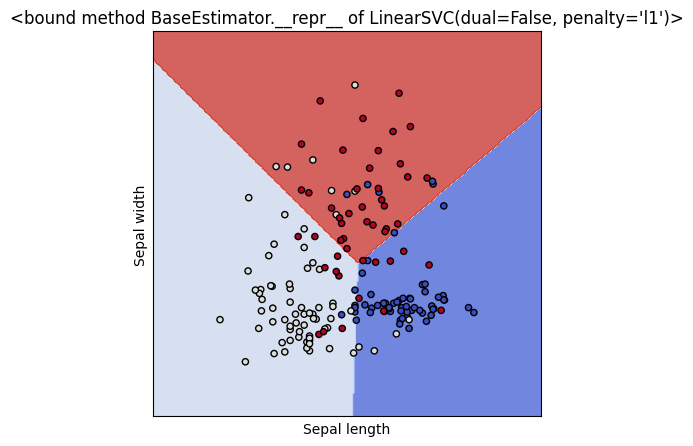

In [42]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=1000))

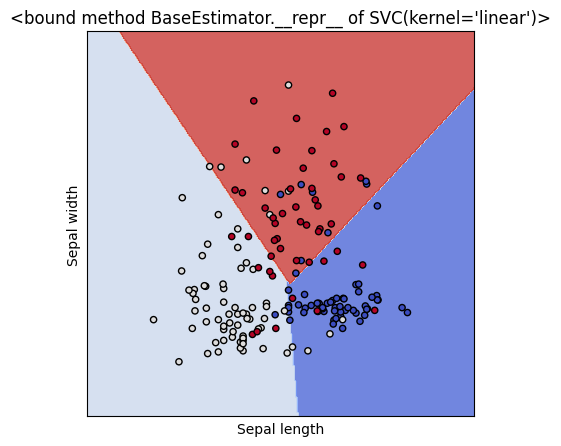

In [43]:
plot_cl(SVC(kernel='linear', C=1.0))

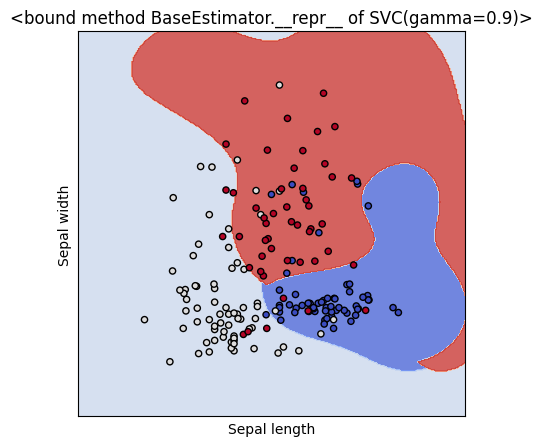

In [44]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

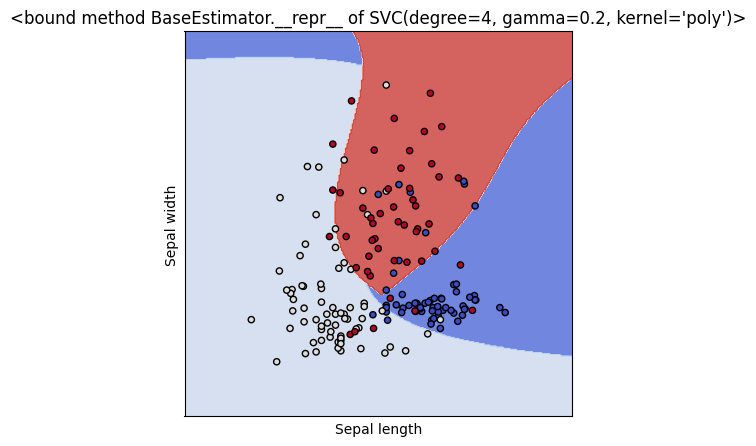

In [45]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))

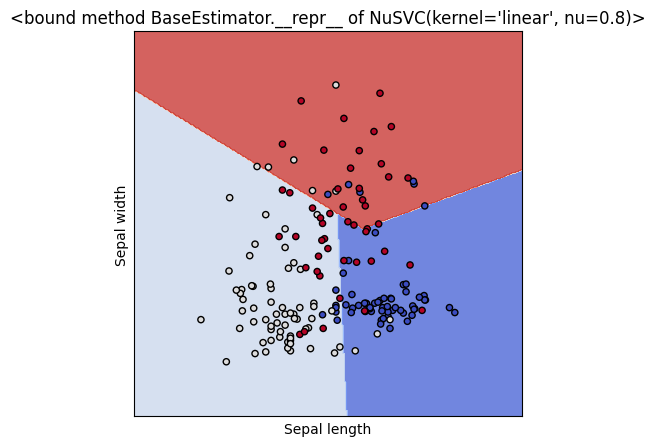

In [46]:
plot_cl(NuSVC(kernel='linear', nu=0.8))

Градиентный бустинг

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

{'LinearSVC': {'accuracy': 0.7777777777777778, 'f1_score': 0.7819535221496006},
 'SVC (linear kernel)': {'accuracy': 0.7777777777777778,
  'f1_score': 0.7819535221496006},
 'SVC (rbf kernel)': {'accuracy': 0.8888888888888888,
  'f1_score': 0.8944855967078189},
 'SVC (poly kernel)': {'accuracy': 0.8333333333333334,
  'f1_score': 0.8435897435897436},
 'NuSVC': {'accuracy': 0.8055555555555556, 'f1_score': 0.7873661459868357}}

In [48]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.2, random_state=42)

In [49]:
model = xgb.XGBClassifier()

In [50]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
predictions = model.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8055555555555556

In [53]:
classification_report(y_test, predictions, target_names=data.target_names)
formatted_report = "\n".join([line.strip() for line in report.splitlines()])
formatted_report

Accuracy: 80.6

Classification Report:
precision    recall  f1-score   support

class_0       1.00      0.71      0.83        14
class_1       0.80      0.86      0.83        14
class_2       0.64      0.88      0.74         8

accuracy                           0.81        36
macro avg       0.81      0.82      0.80        36
weighted avg       0.84      0.81      0.81        36
